In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
primary = pd.read_csv("data/2016_presidential_election/primary_results.csv",sep=",")
counties = pd.read_csv("data/2016_presidential_election/county_facts.csv",sep=",")

In [3]:
print(primary.shape)	#라인수, 컬럼수 확인
print(primary.columns) 	#컬럼명 확인
primary.head()	#상위 5개 행의 데이터 확인

(13212, 8)
Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')


,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [4]:
primary['party'].unique()

array(['Republican', 'Democrat'], dtype=object)

In [5]:
print(counties.shape)
print(counties.columns)
counties.head()

(3195, 54)
Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')


,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


### 각 후보별 전체 득표수 계산하기

In [6]:
candidate_to_votes_s = primary.groupby("candidate")["votes"].sum().sort_values()

In [7]:
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

<AxesSubplot:ylabel='candidate'>

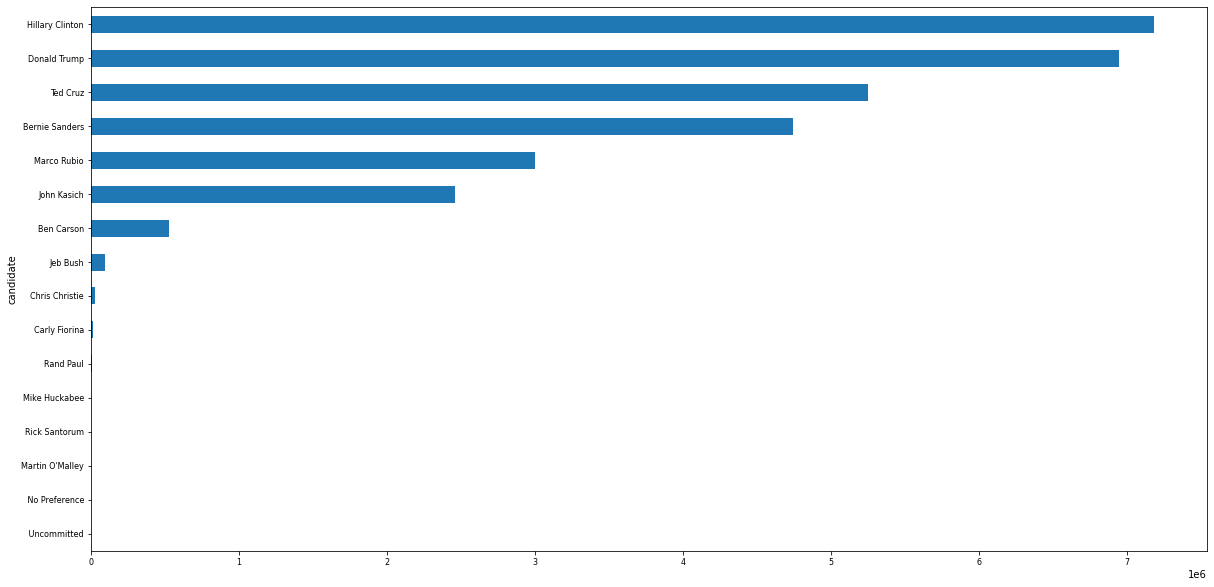

In [8]:
plt.figure(figsize=(20,10))
candidate_to_votes_s.plot(kind="barh", fontsize=8)

### 각 주별, 각 정당의 득표 비율 계산하기
### 각 주별, 정당별 득표수 계산하기

In [9]:
state_party_to_votes_s = primary.groupby(["state", "party"])["votes"].sum()

In [10]:
state_party_to_votes_s

state           party     
Alabama         Democrat       381810
                Republican     805814
Arizona         Democrat       399097
                Republican     435103
Arkansas        Democrat       207182
                Republican     395108
Colorado        Democrat       121184
Florida         Democrat      1611617
                Republican    2156298
Georgia         Democrat       642420
                Republican    1232089
Idaho           Democrat        23567
                Republican     211484
Illinois        Democrat       658976
                Republican     881888
Iowa            Democrat       139682
                Republican     185508
Kentucky        Republican     225709
Louisiana       Democrat       256849
                Republican     240017
Maine           Democrat          101
Massachusetts   Democrat        51613
                Republican      31517
Michigan        Democrat      1159586
                Republican    1227909
Mississippi     Democra

In [11]:
#각 주별 득표수
state_to_votes_s = primary.groupby("state")["votes"].sum()

In [12]:
state_to_votes_s

state
Alabama           1187624
Arizona            834200
Arkansas           602290
Colorado           121184
Florida           3767915
Georgia           1874509
Idaho              235051
Illinois          1540864
Iowa               325190
Kentucky           225709
Louisiana          496866
Maine                 101
Massachusetts       83130
Michigan          2387495
Mississippi        577735
Missouri          1031302
Nebraska            33460
Nevada              86815
New Hampshire      525966
North Carolina    2180023
Ohio              3204172
Oklahoma           759340
South Carolina    1105408
Tennessee         1197202
Texas             4091652
Utah               254203
Vermont             18221
Virginia          1496131
Name: votes, dtype: int64

### state별, party별 득표수의 합의 퍼센티지 구함

In [13]:
state_party_to_vote_pcts_s = state_party_to_votes_s / state_to_votes_s

In [14]:
state_party_to_vote_pcts_s

state           party     
Alabama         Democrat      0.321491
                Republican    0.678509
Arizona         Democrat      0.478419
                Republican    0.521581
Arkansas        Democrat      0.343990
                Republican    0.656010
Colorado        Democrat      1.000000
Florida         Democrat      0.427721
                Republican    0.572279
Georgia         Democrat      0.342714
                Republican    0.657286
Idaho           Democrat      0.100263
                Republican    0.899737
Illinois        Democrat      0.427667
                Republican    0.572333
Iowa            Democrat      0.429540
                Republican    0.570460
Kentucky        Republican    1.000000
Louisiana       Democrat      0.516938
                Republican    0.483062
Maine           Democrat      1.000000
Massachusetts   Democrat      0.620871
                Republican    0.379129
Michigan        Democrat      0.485691
                Republican    0.51430

In [15]:
print(type(state_party_to_vote_pcts_s))
print(state_party_to_vote_pcts_s.index)

<class 'pandas.core.series.Series'>
MultiIndex([(       'Alabama',   'Democrat'),
            (       'Alabama', 'Republican'),
            (       'Arizona',   'Democrat'),
            (       'Arizona', 'Republican'),
            (      'Arkansas',   'Democrat'),
            (      'Arkansas', 'Republican'),
            (      'Colorado',   'Democrat'),
            (       'Florida',   'Democrat'),
            (       'Florida', 'Republican'),
            (       'Georgia',   'Democrat'),
            (       'Georgia', 'Republican'),
            (         'Idaho',   'Democrat'),
            (         'Idaho', 'Republican'),
            (      'Illinois',   'Democrat'),
            (      'Illinois', 'Republican'),
            (          'Iowa',   'Democrat'),
            (          'Iowa', 'Republican'),
            (      'Kentucky', 'Republican'),
            (     'Louisiana',   'Democrat'),
            (     'Louisiana', 'Republican'),
            (         'Maine',   'Democrat')

In [16]:
#인덱스로 되어 있던 party(정당) 을 칼럼으로 보낸것임 - 최하위 인덱스를 칼럼으로 보냄
state_party_to_vote_pcts_df = state_party_to_vote_pcts_s.unstack()

In [17]:
print(type(state_party_to_vote_pcts_df))
print(state_party_to_vote_pcts_df.index)
print(state_party_to_vote_pcts_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Florida', 'Georgia',
       'Idaho', 'Illinois', 'Iowa', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska',
       'Nevada', 'New Hampshire', 'North Carolina', 'Ohio', 'Oklahoma',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia'],
      dtype='object', name='state')
Index(['Democrat', 'Republican'], dtype='object', name='party')


<AxesSubplot:ylabel='state'>

<Figure size 1440x720 with 0 Axes>

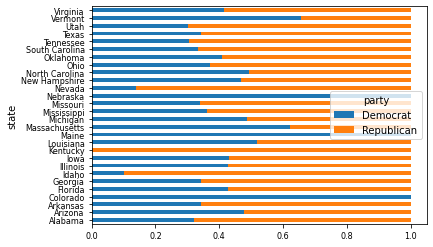

In [18]:
plt.figure(figsize=(20,10))
state_party_to_vote_pcts_df.plot(kind="barh", stacked=True, fontsize=8)

## 아래의 내용을 하기전에 merge를 설명하고 primary와 counties 를 merge하는 연습하기

In [19]:
#merge 연습 fips 칼럼 기준으로 merge
pd.merge(primary, counties, on="fips")

,state,state_abbreviation_x,county,fips,party,candidate,votes,fraction_votes,area_name,state_abbreviation_y,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445000,Autauga County,AL,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205000,Autauga County,AL,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148000,Autauga County,AL,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146000,Autauga County,AL,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035000,Autauga County,AL,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13207,New Hampshire,NH,Sullivan,33019,Republican,Donald Trump,3080,0.380952,Sullivan County,NH,...,0.0,24.8,640776,0,562392,13154,32307,53,537.31,81.4
13208,New Hampshire,NH,Sullivan,33019,Republican,Jeb Bush,824,0.101917,Sullivan County,NH,...,0.0,24.8,640776,0,562392,13154,32307,53,537.31,81.4
13209,New Hampshire,NH,Sullivan,33019,Republican,John Kasich,1334,0.164997,Sullivan County,NH,...,0.0,24.8,640776,0,562392,13154,32307,53,537.31,81.4
13210,New Hampshire,NH,Sullivan,33019,Republican,Marco Rubio,895,0.110699,Sullivan County,NH,...,0.0,24.8,640776,0,562392,13154,32307,53,537.31,81.4


In [20]:
#primary의 모든 컬럼과 counties의 'fips'와 'RHI425214' 컬럼  join
pd.merge(primary, counties[['fips','RHI425214']], on="fips")

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,RHI425214
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445000,1.1
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205000,1.1
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148000,1.1
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146000,1.1
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035000,1.1
...,...,...,...,...,...,...,...,...,...
13207,New Hampshire,NH,Sullivan,33019,Republican,Donald Trump,3080,0.380952,0.7
13208,New Hampshire,NH,Sullivan,33019,Republican,Jeb Bush,824,0.101917,0.7
13209,New Hampshire,NH,Sullivan,33019,Republican,John Kasich,1334,0.164997,0.7
13210,New Hampshire,NH,Sullivan,33019,Republican,Marco Rubio,895,0.110699,0.7


In [21]:
#primary의 'fips','party' 컬럼과 counties의 'fips'와 'RHI425214' 컬럼  outer join
#pd.merge(primary[['fips','party']], counties[['fips','RHI425214']], on="fips") #13211
pd.merge(primary[['fips','party']], counties[['fips','RHI425214']], on="fips",how='outer') #14358

,fips,party,RHI425214
0,1001,Republican,1.1
1,1001,Republican,1.1
2,1001,Republican,1.1
3,1001,Republican,1.1
4,1001,Republican,1.1
...,...,...,...
14354,56037,NaN,0.9
14355,56039,NaN,1.3
14356,56041,NaN,0.5
14357,56043,NaN,0.7


In [22]:
#100개의 row 만 가져와서 merge 함
pd.merge(primary.loc[:100,['state','fips','county','party']], counties.loc[:100,['fips','area_name','RHI425214']], on="fips",how='left')

,state,fips,county,party,area_name,RHI425214
0,Alabama,1001,Autauga,Republican,Autauga County,1.1
1,Alabama,1001,Autauga,Republican,Autauga County,1.1
2,Alabama,1001,Autauga,Republican,Autauga County,1.1
3,Alabama,1001,Autauga,Republican,Autauga County,1.1
4,Alabama,1001,Autauga,Republican,Autauga County,1.1
...,...,...,...,...,...,...
96,Alabama,1027,Clay,Democrat,Clay County,0.3
97,Alabama,1027,Clay,Democrat,Clay County,0.3
98,Alabama,1029,Cleburne,Republican,Cleburne County,0.2
99,Alabama,1029,Cleburne,Republican,Cleburne County,0.2


In [23]:
primary['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'Colorado', 'Florida', 'Georgia',
       'Idaho', 'Illinois', 'Iowa', 'Kentucky', 'Louisiana', 'Maine',
       'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska',
       'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'New Hampshire'], dtype=object)

In [24]:
primary.loc[primary['state'] == 'Alabama',:]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035
...,...,...,...,...,...,...,...,...
450,Alabama,AL,Winston,1133,Republican,Marco Rubio,708,0.119
451,Alabama,AL,Winston,1133,Republican,Ben Carson,539,0.090
452,Alabama,AL,Winston,1133,Republican,John Kasich,163,0.027
453,Alabama,AL,Winston,1133,Democrat,Hillary Clinton,303,0.667


In [25]:
#Alabama state 인 row 의 merge
pd.merge(primary.loc[primary['state'] == 'Alabama',['state','fips','county','party','candidate']], counties.loc[:,['fips','area_name','RHI425214']], on="fips",how='left')

,state,fips,county,party,candidate,area_name,RHI425214
0,Alabama,1001,Autauga,Republican,Donald Trump,Autauga County,1.1
1,Alabama,1001,Autauga,Republican,Ted Cruz,Autauga County,1.1
2,Alabama,1001,Autauga,Republican,Marco Rubio,Autauga County,1.1
3,Alabama,1001,Autauga,Republican,Ben Carson,Autauga County,1.1
4,Alabama,1001,Autauga,Republican,John Kasich,Autauga County,1.1
...,...,...,...,...,...,...,...
450,Alabama,1133,Winston,Republican,Marco Rubio,Winston County,0.3
451,Alabama,1133,Winston,Republican,Ben Carson,Winston County,0.3
452,Alabama,1133,Winston,Republican,John Kasich,Winston County,0.3
453,Alabama,1133,Winston,Democrat,Hillary Clinton,Winston County,0.3


In [26]:
#fips 컬럼을 index로 변경함
counties2 = counties.set_index("fips")

In [27]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [28]:
counties2.head()

,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [29]:
#인덱스 기준 merging
pd.merge(primary, counties2[['area_name','PST045214']], left_on="fips", right_index=True)
#pd.merge(primary[['fips','county','party']], counties2[['area_name','PST045214']], left_on="fips", right_index=True)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,area_name,PST045214
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445000,Autauga County,55395
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205000,Autauga County,55395
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148000,Autauga County,55395
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146000,Autauga County,55395
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035000,Autauga County,55395
...,...,...,...,...,...,...,...,...,...,...
13207,New Hampshire,NH,Sullivan,33019,Republican,Donald Trump,3080,0.380952,Sullivan County,43103
13208,New Hampshire,NH,Sullivan,33019,Republican,Jeb Bush,824,0.101917,Sullivan County,43103
13209,New Hampshire,NH,Sullivan,33019,Republican,John Kasich,1334,0.164997,Sullivan County,43103
13210,New Hampshire,NH,Sullivan,33019,Republican,Marco Rubio,895,0.110699,Sullivan County,43103


In [30]:
#계층적 인덱싱 만들기
primary2 = primary.set_index(["state","county"])

In [31]:
primary2.head()

state_abbreviation  fips       party     candidate  votes  \
state   county                                                              
Alabama Autauga                 AL  1001  Republican  Donald Trump   5387   
        Autauga                 AL  1001  Republican      Ted Cruz   2482   
        Autauga                 AL  1001  Republican   Marco Rubio   1785   
        Autauga                 AL  1001  Republican    Ben Carson   1764   
        Autauga                 AL  1001  Republican   John Kasich    421   

                 fraction_votes  
state   county                   
Alabama Autauga           0.445  
        Autauga           0.205  
        Autauga           0.148  
        Autauga           0.146  
        Autauga           0.035

In [32]:
#3개의 컬럼을 인덱스로 변경해줌
primary2 = primary.set_index(["state","county","party"])

In [33]:
primary2.head()

state_abbreviation  fips     candidate  votes  \
state   county  party                                                      
Alabama Autauga Republican                 AL  1001  Donald Trump   5387   
                Republican                 AL  1001      Ted Cruz   2482   
                Republican                 AL  1001   Marco Rubio   1785   
                Republican                 AL  1001    Ben Carson   1764   
                Republican                 AL  1001   John Kasich    421   

                            fraction_votes  
state   county  party                       
Alabama Autauga Republican           0.445  
                Republican           0.205  
                Republican           0.148  
                Republican           0.146  
                Republican           0.035

In [34]:
#기존 열을 그대로 유지하고 싶다면 drop=False
primary2 = primary.set_index(["state","county","party"],drop=False)

In [35]:
#각 후보가 당선된 county의 평균 백인 유권자 비율 조사하기 하기전에 연습할 내용

In [36]:
#fips 마다 후보자들의 득표수가 있다는 것을 확인함
primary.loc[primary["fips"] == 1005,:].sort_values("votes",ascending=False)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
19,Alabama,AL,Barbour,1005,Democrat,Hillary Clinton,2567,0.906
14,Alabama,AL,Barbour,1005,Republican,Donald Trump,1710,0.501
15,Alabama,AL,Barbour,1005,Republican,Ted Cruz,609,0.179
16,Alabama,AL,Barbour,1005,Republican,Marco Rubio,498,0.146
17,Alabama,AL,Barbour,1005,Republican,Ben Carson,417,0.122
20,Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078
18,Alabama,AL,Barbour,1005,Republican,John Kasich,123,0.036


In [37]:
primary.loc[primary["fips"] == 1005,:].sort_values("votes",ascending=False)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
19,Alabama,AL,Barbour,1005,Democrat,Hillary Clinton,2567,0.906
14,Alabama,AL,Barbour,1005,Republican,Donald Trump,1710,0.501
15,Alabama,AL,Barbour,1005,Republican,Ted Cruz,609,0.179
16,Alabama,AL,Barbour,1005,Republican,Marco Rubio,498,0.146
17,Alabama,AL,Barbour,1005,Republican,Ben Carson,417,0.122
20,Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078
18,Alabama,AL,Barbour,1005,Republican,John Kasich,123,0.036


In [38]:
primary.loc[primary["fips"] == 1005,:].sort_values("votes",ascending=False).iloc[0]

state                         Alabama
state_abbreviation                 AL
county                        Barbour
fips                             1005
party                        Democrat
candidate             Hillary Clinton
votes                            2567
fraction_votes                  0.906
Name: 19, dtype: object

In [39]:
#fips별 최대 득표수
primary.groupby("fips")["votes"].max()

fips
1001      5387
1003     23618
1005      2567
1007      1959
1009      7390
         ...  
51650    13529
51700    12495
51710    15747
51800     7533
51810    22352
Name: votes, Length: 2048, dtype: int64

In [40]:
#각 후보가 당선된 county의 평균 백인 유권자 비율 조사하기
func = lambda agg_df: agg_df.sort_values("votes", ascending=False).iloc[0]
winners = primary.groupby("fips").agg(func)

ValueError: No axis named votes for object type Series

In [ ]:
winners.head()

In [ ]:
#primary와 counties 데이터프레임을 merge 한다.  White alone(백인)
winners_county_races = pd.merge(winners, counties[["fips", "RHI825214"]], left_index=True, right_on="fips", how="left")

In [ ]:
winners_county_races.head()

In [ ]:
#컬럼명  변경
winners_county_races = winners_county_races.rename(columns={"RHI825214":"white_pcts"})

In [ ]:
winners_county_races.head()

In [ ]:
winners_county_white_pcts = winners_county_races.groupby(["party", "candidate"])["white_pcts"].mean()

In [ ]:
winners_county_white_pcts

In [ ]:
#plt.figure()
plt.figure(figsize=(24,10))
ax = winners_county_white_pcts.plot(kind="barh", fontsize=10)
ax.set_xlim([50, 100])
plt.tight_layout()

In [ ]:
#이와 같은 groupby 구문 대신에 위와 같은 pivot_table() 함수를 사용할 수 있다. 
#state별 candidate의 득표수의 합
primary.groupby(["state","candidate"])["votes"].sum()

In [ ]:
total_votes = primary.pivot_table(values="votes", index="state", 
                    columns="candidate", aggfunc="sum",fill_value=0)

In [ ]:
total_votes

In [ ]:
#state_abbreviation별, party 별 투표비율의 평균
primary.groupby(['state_abbreviation','party'])["fraction_votes"].mean()

In [ ]:
#pivot_table 사용
mean_frac_votes=primary.pivot_table(values="fraction_votes", index="state_abbreviation", 
                    columns="party", aggfunc="mean")

In [ ]:
mean_frac_votes